# **Tugas Besar Pembelajaran Mesin (Classification)**

Kelas : IF-43-12

Anggota : 
- Raihan Romzi Rakhman (1301194376)
- Haydar Rizaldy Putera Prayudi (1301194388)

<br><br>

## **Import Library**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import plotly.express as px
import math
from scipy.stats import mode
warnings.filterwarnings('ignore')

<br><br>

## **Import Dataset**

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/raihanromzi/Python.Classification_ML/main/Datasets/kendaraan_clean_pca.csv")
df.sample(5)

In [ ]:
df.info()

<br><br>

## **Dataset Visualization**

In [ ]:
fig = px.scatter(df, x="Component_1", y="Component_2", color="Tertarik")
fig.show()

<br><br>

## **Splitting Dataset**

<br>

Source : 
*   https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/
*   https://towardsdatascience.com/intro-to-feature-selection-methods-for-data-science-4cae2178a00a


In [ ]:
data = ["Component_1", "Component_2", "Tertarik"]

X = df[data]

In [ ]:
# Import Library
from sklearn.model_selection import train_test_split

# Memisahkan Dataset menjadi Training dan Test, data yang digunakan untuk test adalah 50% dari keseluruhan data
df_train, df_test = train_test_split(X, test_size=0.5, random_state=1)

In [ ]:
# 166633 Data Training
fig = px.scatter(df_train, x="Component_1", y="Component_2", color="Tertarik")
fig.show()

In [ ]:
# 166633 Data Test
fig = px.scatter(df_test, x="Component_1", y="Component_2", color="Tertarik")
fig.show()

<br><br>

## **Classification**

### **Decision Tree**

*   https://medium.com/@snk.nitin/decision-trees-random-forests-and-pca-e676e4c142c6
*   https://youtu.be/jVh5NA9ERDA
*   https://www.youtube.com/watch?v=5wwXKtLkyqs&t=1582s
*   https://www.youtube.com/watch?v=y6DmpG_PtN0  
*  https://youtu.be/Ud5XlhG8-gU
*  https://youtu.be/ZdKnZ1xKrRA  

In [ ]:
# Convert from dataframe to numpy.ndarray

data_train = pd.DataFrame(data=df_train).to_numpy()
data_test = pd.DataFrame(data=df_test).to_numpy()

#### **Data Pure?**

In [ ]:
def check_purity(data):
    """
    Fungsi untuk mengecek kemurnian data, apakah dalam suatu kelompok data, 
    apakah semua nya dalam satu label (Tertarik) atau tidak.

    Input : Harus berupa 2D numpy.ndArray
    """

    # Memisahkan kolom "Tertarik"
    label_column = data[:,-1]

    # Mengecek berapa jenis (0 dan 1) pada kolom "Tertarik"
    unique_class = np.unique(label_column)

    # Jika unique == 1 artinya jika hanya terdapat 1 jenis (1 atau 0), maka data sudah pure
    if len(unique_class) == 1:
        return True
    else:
        return False

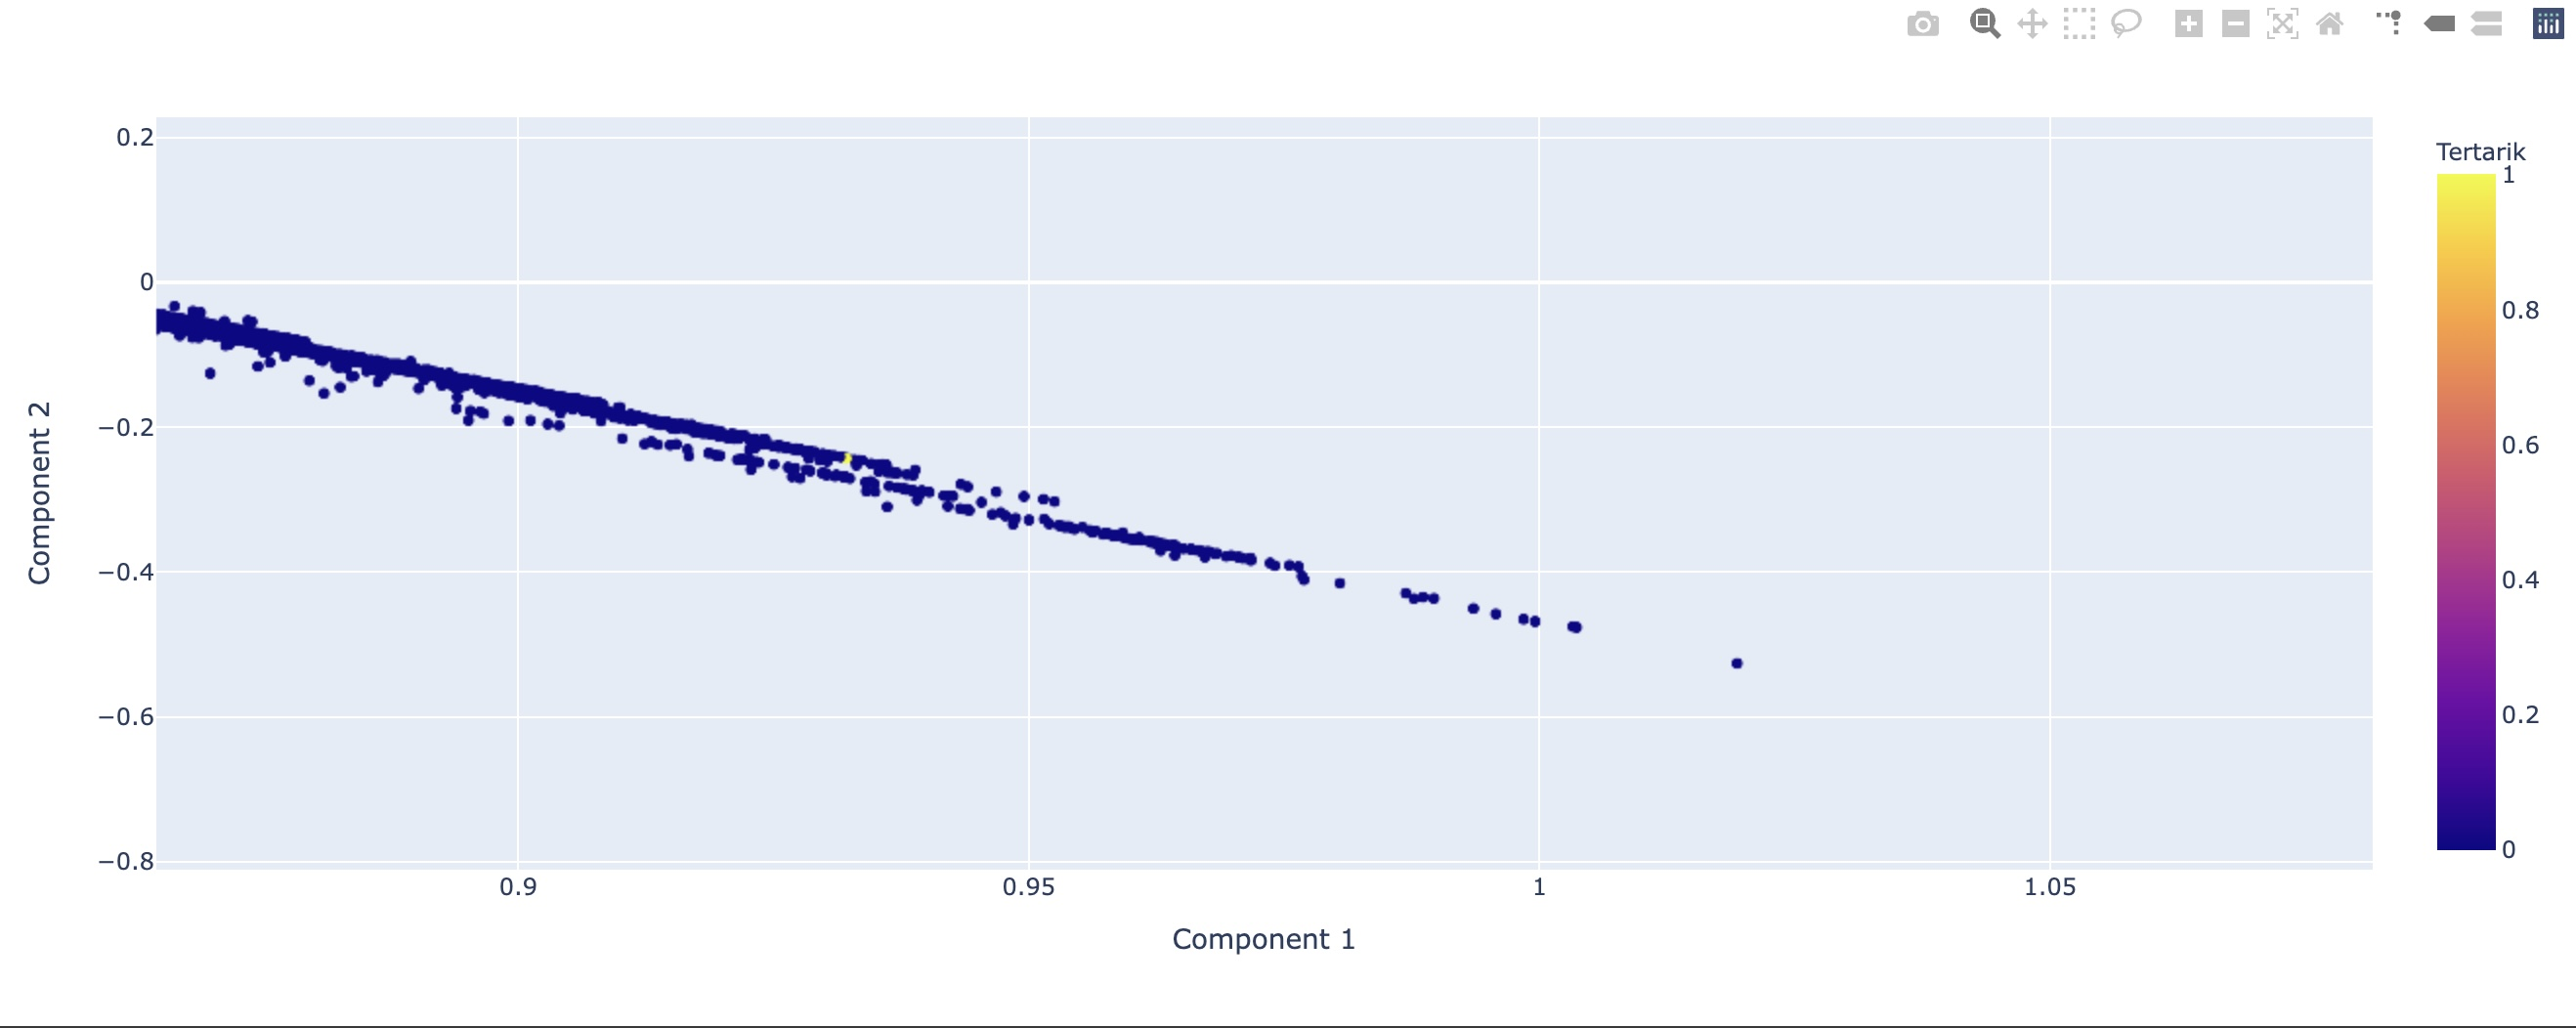

In [ ]:
column_component1 = ["Component_1"]

data_train_component1 = df_train[column_component1].values
data_test_component1 = df_test[column_component1].values

In [ ]:
# Harus berupa numpy.ndArray
# True artinya pada nilai component > 1, terbukti bahwa hanya terdapat 1 label yaitu 0 (Tidak tertarik), berarti data sudah pure

check_purity(df_train[data_train_component1 > 1].values)

In [ ]:
# Harus berupa numpy.ndArray
# False artinya pada data = df_train.value, datanya tidak pure(tidak semua data memiliki label 1 atau 0)

check_purity(df_train[data_train_component1 > 0.8].values)

<br><br>

#### **Classify?**

In [ ]:
def classify_data(data):
    """
    Fungsi untuk mengecek data tersebut masuk ke label tertarik yang mana, 
    dengan memilih label yang paling banyak keluar.

    Input : Harus berupa 2D numpy.ndArray
    """
    
    # Memisahkan kolom "Tertarik"
    label_column = data_train[:,-1]

    # Menghitung jumlah 0 dan 1
    unique_class, count_unique_class = np.unique(label_column, return_counts=True)

    # Mengembalikan jumlah terbayak berdasarkan index
    index = count_unique_class.argmax()

    # Data yang paling banyak keluar
    classification = unique_class[index]

    return classification

In [ ]:
# Pada seluruh data, yang paling banyak muncul adalah tidak tertarik (0)
classify_data(data_train)

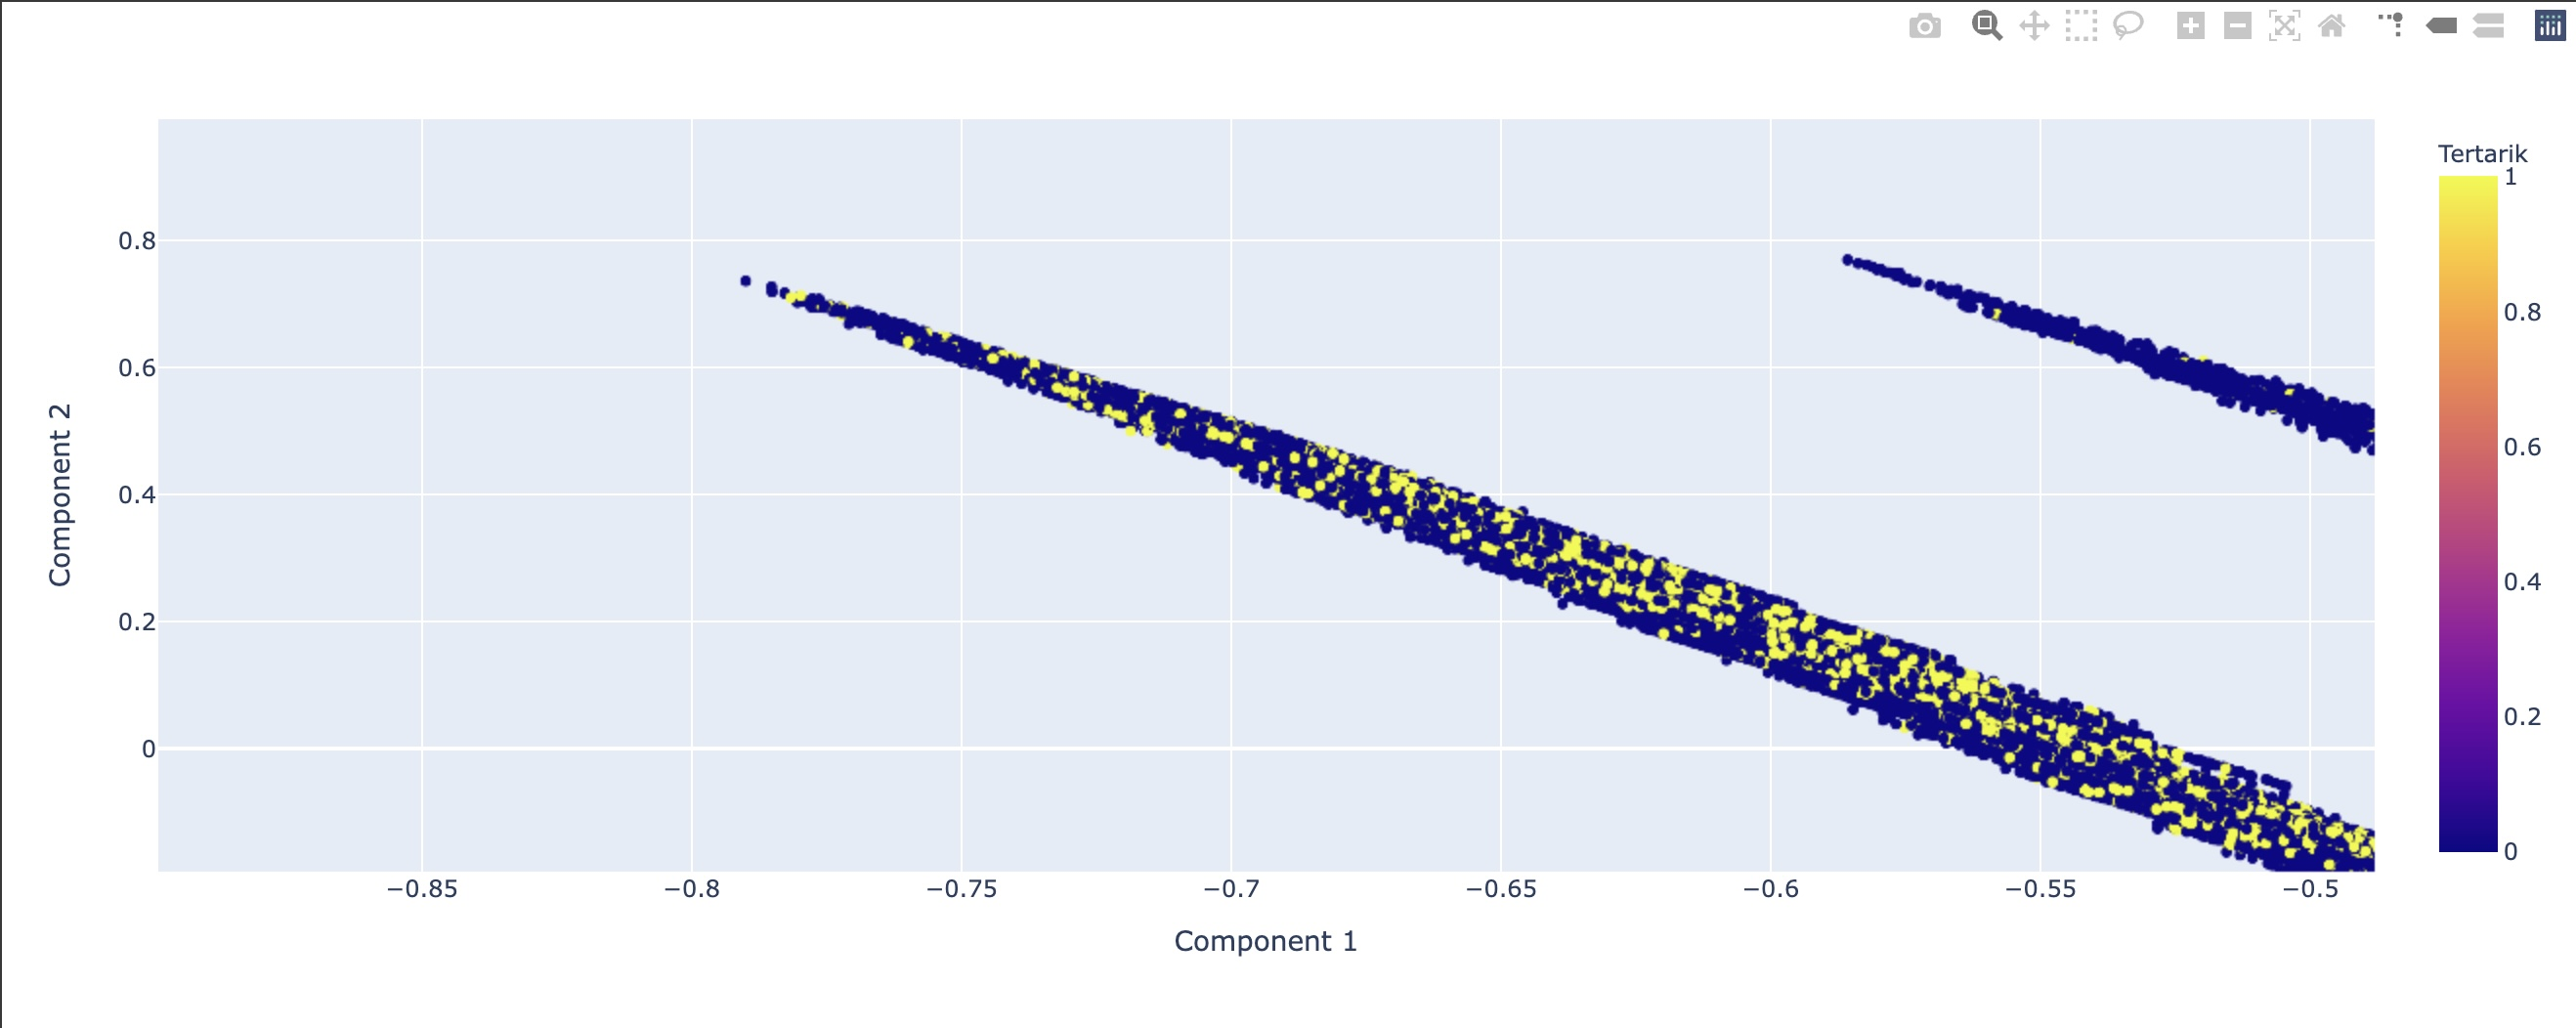

In [ ]:
# Pada data dengan nilai component1 < 1 dan component1 > 0.8, yang paling banyak keluar adalah tidak tertarik (0)
classify_data(df_train[(data_train_component1 > -0.7) & (data_train_component1 > -0.5)].values)

<br><br>

#### **Potential Split?**

In [ ]:
def get_potential_split(data):
    """
    Fungsi ini digunakan untuk memastikan apakah suatu titik bisa dijadikan titik 
    untuk melakukan split data, untuk membuat node baru. Titik yang bisa digunakan 
    terletak ditengah-tengah antar data.

    Input : Harus berupa 2D numpy.ndArray
    """

    # Dictionary untuk menyimpan nilai
    potential_splits = {}

    # Data shape mengembalikan jumlah total row dan column. _ digunakan untuk menyimpan jumlah row, dan n_columns untuk menyimpan jumlah column
    _, n_columns = data.shape

    # Kolom terakhir yaitu ("Tertarik") tidak digunakan
    for column_index in range(n_columns - 1):

        # Dictionary index ke - column_index, dibuat list didalamnya 
        potential_splits[column_index] = []
        values = data[:, column_index]

        # Berisikan nilai data yang unik, sehingga bisa digunakan untuk menentukan split point
        unique_values = np.unique(values)

        # Melakukan loop pada unique value, untuk mendapatkan nilai tengah antar data
        for i in range(len(unique_values)):

            # Element index 0 tidak dimasukkan, karena tidak memiliki previous
            if i != 0:

                try:

                    # current value adalah unique_value index saat ini
                    current_value = unique_values[i]

                    # Previous
                    previous_value = unique_values[i - 1]

                    # Titik split yaitu nilai tengah antara Current dan Previous
                    split_value = (current_value + previous_value) / 2
                    
                    # Memasukkannya kedalam dictionary
                    potential_splits[column_index].append(split_value)
                  
                except:
                  pass

    return potential_splits

In [ ]:
# Test fungsi get split data point, menggunakan 2D numpy.ndArray
data_test_split = df_train.sample(50)

# Ubah ke numpy.ndArray
data_test_split_np_array = pd.DataFrame(data=data_test_split).to_numpy()

potential_points_test = get_potential_split(data_test_split_np_array)

Dalam proses ini, kami hanya menunjukkan dengan 10 data, agar visualisasi menjadi lebih mudah. Sebab jika keseluruhan data, maka sudah tidak bisa terlihat lagi proses split data nya, karena terlalu banyak titik split.

In [ ]:
# Visualisai Data Train
sns.lmplot(data=data_test_split, x="Component_1", y="Component_2" ,hue="Tertarik",  fit_reg=False, size=8, aspect=1.5)

# Mengambil titik potential untuk column ke 1 yaitu "Component 1"
plt.vlines(x=potential_points_test[0], ymin=-1, ymax=1)

In [ ]:
# Visualisai Data Train
sns.lmplot(data=data_test_split, x="Component_1", y="Component_2" ,hue="Tertarik",  fit_reg=False, size=8, aspect=1.5)

# Mengambil titik potential untuk column ke 2 yaitu "Component 2"
plt.hlines(y=potential_points_test[1], xmin=-0.8, xmax=0.8)

<br><br>

#### **Split Data**

In [ ]:
def split_data(data, split_column, split_point):
    """
    Fungsi ini digunakan untuk melakukan split data, untuk menghasilkan node.
    
    Input : Harus berupa 2D numpy.ndArray, Column mana yang akan di split (X atau Y), dan Titik split
    """
    
    # Melakukan split dengan mengakses seluruh row dengan index split_column
    split_column_values = data[:, split_column]

    # Membandingkan, apakah nilai nya lebih besar atau kecil daripada split_point
    data_bawah = data[split_column_values <= split_point]
    data_atas = data[split_column_values >  split_point]
    
    return data_bawah, data_atas

In [ ]:
# Test Fungsi
data_bawah, data_atas = split_data(data_train, 0, 0.12)

In [ ]:
data_bawah

In [ ]:
data_atas

In [ ]:
# Visualisasi
sns.lmplot(data=df_train, x="Component_1", y="Component_2" ,hue="Tertarik",  fit_reg=False, size=8, aspect=1.5)
plt.vlines(x=0.12, ymin=-1, ymax=1)

In [ ]:
# Visualisasi Data Bawah
column_data = ["Component_1", "Component_2", "Tertarik"]
data_bawah_visualisasi = pd.DataFrame(data=data_bawah, columns=column_data)

sns.lmplot(data=data_bawah_visualisasi, x="Component_1", y="Component_2" ,hue="Tertarik",  fit_reg=False, size=8, aspect=1.5)
plt.vlines(x=0.12, ymin=-1, ymax=1)
plt.xlim(-1, 1)

In [ ]:
# Visualisasi Data Atas
data_atas_visualisasi = pd.DataFrame(data=data_atas, columns=column_data)

sns.lmplot(data=data_atas_visualisasi, x="Component_1", y="Component_2" ,hue="Tertarik",  fit_reg=False, size=8, aspect=1.5)
plt.vlines(x=0.12, ymin=-1, ymax=1)
plt.xlim(-1, 1)

<br><br>

#### **Lowest Overall Entropy?**

Pada bagian ini, dilakukan proses :


1.   Melihat Titik Potensial dilakukan split
2.   Menentukan nilai Entropy nya, dan menetapkan split terbaik yang harus dilakukan



In [ ]:
def hitung_entropy(data):
    """
    Fungsi ini menghitung nilai entropi, untuk setiap data yang di split

    Input : Harus berupa 2D numpy.ndArray
    """

    # Mengambil kolom tertarik
    tertarik_column = data[:, -1]

    # Kita hanya akan mengambil "Counts" yang berisi banyak nya label tertarik 1 dan 0
    _, counts = np.unique(tertarik_column, return_counts=True)

    # Menghitung nilai probabilitas dengan membagi label yang ada, dengan keseluruhan jumlah label
    probabilitas = counts / counts.sum()

    # Menghitung nilai entropi
    entropy = np.sum(probabilitas * -np.log2(probabilitas))
     
    return entropy

In [ ]:
# Testing Function dengan data bawah yang diperoleh dari proses split data
hitung_entropy(data_bawah)

In [ ]:
# Testing Function dengan data atas yang diperoleh dari proses split data
hitung_entropy(data_atas)

<br>

In [ ]:
def hitung_overall_entropy(data_bawah, data_atas):
    """
    Fungsi ini menghitung rata-rata dari 2 entropy

    Input : Harus berupa 2D numpy.ndArray
    """
    
    # Menghitung jumlah panjang seluruh data
    n = len(data_bawah) + len(data_atas)

    # Menghitung probabilitas data
    p_data_bawah = len(data_bawah) / n
    p_data_atas = len(data_atas) / n

    # Rumus menghitung rata-rata entropi
    overall_entropy =  (p_data_bawah * hitung_entropy(data_bawah) 
                      + p_data_atas * hitung_entropy(data_atas))
    
    return overall_entropy

In [ ]:
# Testing
hitung_overall_entropy(data_bawah, data_atas)

<br>

In [ ]:
def get_best_split(data, potential_splits):
    """ 
    Fungsi ini berfungsi, setelah kita bisa menghitung nilai entropy, dan rata-ratanya, selanjutnya adalah
    menentukan mana split terbaik yang bisa dilakukan
    
    Input : Harus berupa 2D numpy.ndArray, titik potential_splits
    """
    
    # Inisialisasi rata-rata entropy
    overall_entropy = 9999

    # Loop ke semua titik potential split
    for i in potential_splits:

        # Untuk setiap titik di potential split, dihitung rata-rata entropy nya
        for point in potential_splits[i]:
            data_bawah, data_atas = split_data(data, split_column=i, split_point=point)
            current_overall_entropy = hitung_overall_entropy(data_bawah, data_atas)

            # Membandingkannya dengan inisialisasi rata-rata entropy diawal
            if current_overall_entropy <= overall_entropy:

                # Karena akan auto correct, maka nilai current_entropy akan di-assign ke overall_entropy
                overall_entropy = current_overall_entropy

                # Semakin kecil nilai entropy maka akan semakin baik, sebab labelnya akan semakin homogen
                best_split_column = i
                best_split_point = point
    
    return best_split_column, best_split_point

In [ ]:
# Testing - DONT RUN, TOO LONG
data_train_best_split = df_train.sample(60000)
data_test_split_np_array = pd.DataFrame(data=data_train_best_split).to_numpy()
potential_points_test = get_potential_split(data_test_split_np_array)

# Hasil
get_best_split(data_test_split_np_array, potential_points_test)

In [ ]:
# Visualisasi hasil terbaik
sns.lmplot(data=data_train_best_split, x="Component_1", y="Component_2" ,hue="Tertarik",  fit_reg=False, size=8, aspect=1.5)
plt.vlines(x=0.0666902472105749, ymin=-1, ymax=1)

<br><br>

#### **Main Algorithm**

In [ ]:
sub_tree = {"question": ["yes", 
                         "no"]}

In [ ]:
# Contoh tree jika menggunakan dataset iris, agar lebih mudah dibaca
example_tree = {"petal_width <= 0.8": ["Iris-setosa", 
                                      {"petal_width <= 1.65": [{"petal_length <= 4.9": ["Iris-versicolor", 
                                                                                        "Iris-virginica"]}, 
                                                                "Iris-virginica"]}]}

In [ ]:
# data_frame yang kita masukkan dalam parameter bertipe DataFrame
# Counter digunakan saat dilakukan rekursi
def decision_tree_algorithm(data_frame, counter=0, min_sample_data = 2, max_depth = 5):
    
    # Ubah data ke tipe numpy.ndArray
    if counter == 0:

        # Akses kolom data
        global COLUMN_NAME
        COLUMN_NAME = data_frame.columns
        data = data_frame.values
    else:
        data = data_frame           
    
    
    # Step 1 : Mengecek apakah data sudah pure, mengecek min_sample, dan kedalaman tree
    if (check_purity(data) or (len(data) < min_sample_data) or (counter == max_depth)):
        return classify_data(data)
    else:    
        counter += 1

        # Step 2 : Mengecek semua titik potential_split
        potential_splits_points = get_potential_split(data)

        # Step 3 : Menentukan mana titik terbaik untuk dilakukan split
        best_split_column, best_split_point = get_best_split(data, potential_splits_points)

        # Step 4 : Melakukan split data, berdasarkan hasil step 3
        data_bawah, data_atas = split_data(data, best_split_column, best_split_point)
        
        # Build tree
        feature_name = COLUMN_NAME[best_split_column]
        question = "{} <= {}".format(feature_name, best_split_point)
        sub_tree = {question: []}
        
        # Recursion
        yes = decision_tree_algorithm(data_bawah, counter, min_sample_data, max_depth)
        no = decision_tree_algorithm(data_atas, counter, min_sample_data, max_depth)
        
        # Untuk mengecek apakah jawaban yes dan no nya sama, agar tidak terjadi double tree
        # if yes == no:
        #     sub_tree = yes
        # else:
        sub_tree[question].append(yes)
        sub_tree[question].append(no)
            
        return sub_tree

In [ ]:
from pprint import pprint

df_train_sample = df_train.head(10000)
tree = decision_tree_algorithm(df_train_sample)
pprint(tree)

<br><br>

#### **Classification Data Baru**

In [ ]:
def classify_new_data(new_data, tree):
    """
    Fungsi ini berfungsi untuk meng-classification data baru, dan menentukan apakah Tertarik atau Tidak. 

    Input : new data, dan tree sebuah dictionary
    """

    # Mengakses question pada tree index ke 0
    question = list(tree.keys())[0]

    # Memisahkan feature name, operator, dan value dalam node tree
    feature_name, operator, value = question.split()

    # Membandingkan new_data dengan index feature_name berupa nilai "Component 1" atau "Component 2" dengan nilai di value di tree
    if new_data[feature_name] <= float(value):

        # Menyimpan ke variable predict
        predict = tree[question][0]
    else:
        predict = tree[question][1]

    # Mengecek apakah berbentuk dictionary
    if not isinstance(predict, dict):
        return predict
    
    # recursive membandingkan 
    else:
        residual_tree = predict
        return classify_new_data(new_data, residual_tree)

In [ ]:
# Testing
new_data = df_test.iloc[10]
new_data

In [ ]:
# Hasil klasifikasi dapat memprediksi dengan tepat
classify_new_data(new_data, tree)

<br><br>

#### **Accuracy**

In [ ]:
def calculate_accuracy(df, tree):
    """
    Fungsi ini menghitung nilai akurasi berdasarkan rata-rata benar saat melakukan
    prediksi.

    Input : Dataframe, tree
    """

    # Membuat column baru bernama "Result" lalu menaruh hasil prediksi
    df["Result"] = df.apply(classify_new_data, axis=1, args=(tree,))

    # Membuat column baru bernama "Result_correct" berisi nilai true (1) dan false (0)
    df["Result_correct"] = df["Result"] == df["Tertarik"]
    
    # Rata-rata
    accuracy = df["Result_correct"].mean()
    
    return accuracy

In [ ]:
# Testing
df_train_sample_2 = df_train.sample(100)
accuracy = calculate_accuracy(df_train_sample_2, tree)
accuracy

In [ ]:
df_train_sample_2

In [ ]:
df_train_sample_2.loc[94183]

In [ ]:
pprint(tree)

Hasil klasifikasi dapat dilihat di Tree, menghasilkan kesimpulan Tidak Tertarik(0) karena setelah melalui tiap node, berakhir pada nilai 0

<br><br><br><br>

## **Main Program**

### **Step 1 : Split Data**

In [ ]:
df_train

In [ ]:
df_test

<br>

### **Step 2 : Membangun Decision Tree dari Data Training**

In [ ]:
# PLEASE DON'T RUN, TOOKS 3H!
# tree = decision_tree_algorithm(df_train)

<br><br>

### **Step 3 : Membangun Decision Tree dari Data Test dan Membandingkan Akurasi**

In [ ]:
accuracy = calculate_accuracy(df_test, tree)

In [ ]:
accuracy

In [ ]:
pprint(tree)

In [ ]:
df_test